In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
#Загружаю данные по ирисам
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

👀Классификация

In [4]:
# Загружаю данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
data['variety'] = iris.target
data 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#Оставляю в датафрейме только 2 признака
data_ = data[['sepal length (cm)','sepal width (cm)']]
data_


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
#Значения целевой переменной
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Разделяю выборку с 2 переменными на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_, data_class, test_size=0.25)

In [8]:
# Импортирую LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
# Обучаю данные
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# Делаю прогноз на тестовой выборке
lda.predict(x_test)

array([0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2])

In [12]:
# Тестовые значения
y_test

array([0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2])

In [13]:
# Разница факта и прогноза
result = pd.DataFrame([y_test, lda.predict(x_test)]).T

In [14]:
result

,0,1
0,0,0
1,1,1
2,2,1
3,1,2
4,1,1
5,0,0
6,1,1
7,1,1
8,2,2
9,2,2


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
#Расчет точности
accuracy_score(y_test, lda.predict(x_test))

0.8421052631578947

При использовании двух признаков для обучения расчет получается не очень точным

In [17]:
# Коэффициенты дискриминатных линий
lda.coef_

array([[-5.14655378,  7.3435161 ],
       [ 1.58513052, -3.70528147],
       [ 3.88717126, -3.84830449]])

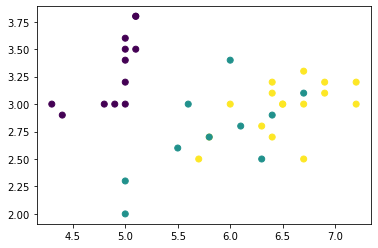

In [18]:
# Визуализирую значения классов для тестовой выборки
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test)
plt.show()

In [19]:
# центроиды
lda.means_

array([[5.04210526, 3.46578947],
       [5.96      , 2.78      ],
       [6.62058824, 2.98235294]])

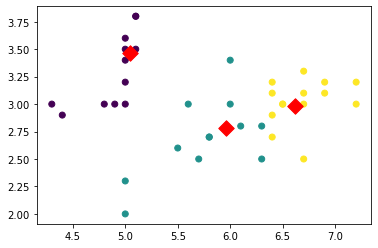

In [20]:
# Визуализирую предсказания для тестовой выборки и центры классов
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=lda.predict(x_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=120, marker='D')

👀Кластеризация

In [21]:
from sklearn.cluster import KMeans

In [22]:
#Создаю массив из двух столбцов датафрейма
arr = data_[['sepal length (cm)','sepal width (cm)']].to_numpy()
arr

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [25]:
# Задаю количество кластеров 2
kmeans = KMeans(n_clusters=2)
# Обучение на данных массива и присвоение каждому объекту кластера
clusters = kmeans.fit_predict(arr)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

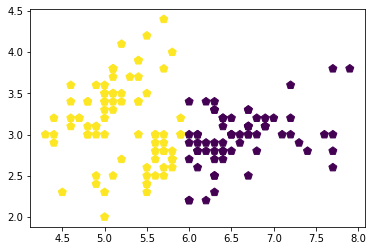

In [26]:
#Визуализирую полученный результат
plt.scatter(arr[:, 0], arr[:, 1],  c=clusters, s=70, marker='p')

In [27]:
# Задаю количество кластеров 3
kmeans = KMeans(n_clusters=3)
# Обучение на данных массива и присвоение каждому объекту кластера
clusters = kmeans.fit_predict(arr)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

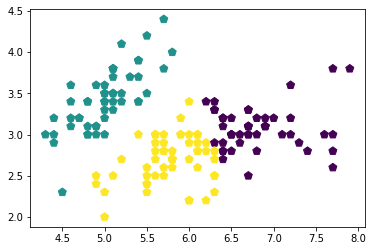

In [28]:
#Визуализирую полученный результат
plt.scatter(arr[:, 0], arr[:, 1],  c=clusters, s=70, marker='p')

In [29]:
# Задаю количество кластеров 4
kmeans = KMeans(n_clusters=4)
# Обучение на данных массива и присвоение каждому объекту кластера
clusters = kmeans.fit_predict(arr)
clusters

array([3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 2, 3, 2, 3, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

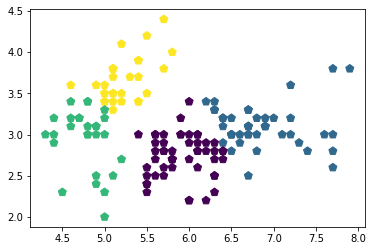

In [30]:
#Визуализирую полученный результат
plt.scatter(arr[:, 0], arr[:, 1],  c=clusters, s=70, marker='p')

In [ ]:
Думаю, оптимальное количество кластеров 3, как оно и сеть на самом деле. Хотя визуально просится разделить на 2. Вот так:

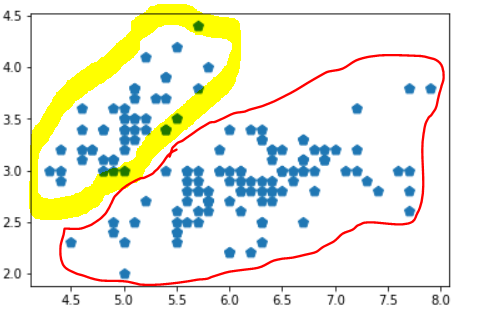